2020_3_27 Remake<br/>

# Bg-removal Experiment
### Pointrend -> Trimap Generation -> Pymatting

#Mount on Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pwd

/content


# Install detectron2

In [0]:
# install dependencies:
# (use +cu100 because colab is on CUDA 10.0)
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9MB 19kB/s 
     |████████████████████████████████| 4.1MB 39.4MB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
  Found existing installation: torchvision 0.5.0
    Uninstalling torchvision-0.5.0:
      Successfully uninstalled torchvision-0.5.0
     |████████████████████████████████| 276kB 1.4MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=223e9644f02ba62458c2ceac884d8be98d52551169915bce2c194b73daa9e52d
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-sh_whot9
  Running command git 

'1.4.0+cu100'

In [0]:
# install detectron2:
!pip install detectron2==0.1.1 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
# clone the repo to access PointRend code. Use the same version as the installed detectron2
!git clone --branch v0.1.1 https://github.com/facebookresearch/detectron2 detectron2_repo

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
     |████████████████████████████████| 6.2MB 603kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.dev200325-cp36-none-any.whl size=38930 sha256=384ebb76fd08defdd8fd899a8c5aaeff100c4ef5cd0fd86196f748417a67f300
  Stored in directory: /root/.cache/pip/wheels/58/4f/d1/6b0ada294145df5fe73092d9849d27be5b5b720fd8cfdd1b98
Successfully built fvcore
Cloning into 'detectron2_repo'...
remote: Enumerating objects: 3763, done.
remote: Total 3763 (delta 0), reused 0 (delta 0), pack-reused 3763
Receiving objects: 100% (3763/3763), 2.19 MiB | 2.00 MiB/s, done.
Resolving deltas: 100% (2612/2612), done.
Note: checking out '401fd04cecec16f1ed0452eb936502d5d33a23be'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to 

In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import torch
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog
coco_metadata = MetadataCatalog.get("coco_2017_val")

# import PointRend project
import sys; sys.path.insert(1, "detectron2_repo/projects/PointRend")
import point_rend

# Install Pymatting

In [0]:
!pip3 install pymatting
from pymatting import cutout

     |████████████████████████████████| 40kB 1.3MB/s 


# Run a pre-trained PointRend model

### We change image format to "~.png"

We first prepare input images.

### At first, out data is '.jpg, .jpeg' so change all image into '.png'<br>
( once you run this shell, don't run one more )

In [0]:
import os

image_dir_path = "/content/drive/My Drive/remake/matting/main-jpg"
image_category = os.listdir(image_dir_path)

image_path = os.path.join(image_dir_path, image_category[0])

for category in image_category:

  image_path = os.path.join(image_dir_path, category)
  print(image_path)

  for file_name in os.listdir(image_path):
    img = cv2.imread(image_path + "/" + file_name)
    print(file_name)
    if file_name[-4:] == ".jpg":
      if os.path.isfile(image_path + "/" + file_name):
        os.remove(image_path + "/" + file_name)
        print(image_path + "/" + file_name)
      cv2.imwrite(image_path + "/" + file_name[:-4] + ".png", img)
    if file_name[-5:] == ".jpeg":
      if os.path.isfile(image_path + "/" + file_name):
        os.remove(image_path + "/" + file_name)
        print(image_path + "/" + file_name)
      cv2.imwrite(image_path + "/" + file_name[:-5] + ".png", img)
    #print(image_path + "/" + file_name[:-4] + ".png")

/content/drive/My Drive/remake/matting/main-jpg/Automobile
Landrover (4).png
Landrover (19).png
Hyundai (11).png
Landrover (11).png
Landrover (14).png
Honda (3).png
Landrover (15).png


KeyboardInterrupt: ignored

In [0]:
import os

def createFolder(dir):
  try:
    if not os.path.exists(dir):
      os.makedirs(dir)
  except OSError:
    print("Error: Creating directory.  " + directory)

In [0]:
def erode_dilate(msk, struc="ELLIPSE", size=(10, 10)):
    if struc == "RECT":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, size)
    elif struc == "CORSS":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, size)
    else:
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size)

    msk = msk.astype(np.float32) / 255.0


    # val in 0 or 255

    dilated = cv2.dilate(msk, kernel, iterations=1) * 255
    eroded = cv2.erode(msk, kernel, iterations=1) * 255

    cnt1 = len(np.where(msk >= 0)[0])
    cnt2 = len(np.where(msk == 0)[0])
    cnt3 = len(np.where(msk == 1)[0])
    # print("all:{} bg:{} fg:{}".format(cnt1, cnt2, cnt3))///
#    assert(cnt1 == cnt2 + cnt3)

    cnt1 = len(np.where(dilated >= 0)[0])
    cnt2 = len(np.where(dilated == 0)[0])
    cnt3 = len(np.where(dilated == 255)[0])
    # print("all:{} bg:{} fg:{}".format(cnt1, cnt2, cnt3))
#    assert(cnt1 == cnt2 + cnt3)

    cnt1 = len(np.where(eroded >= 0)[0])
    cnt2 = len(np.where(eroded == 0)[0])
    cnt3 = len(np.where(eroded == 255)[0])
    #print("all:{} bg:{} fg:{}".format(cnt1, cnt2, cnt3))
#    assert(cnt1 == cnt2 + cnt3)

    res = dilated.copy()
    #res[((dilated == 255) & (msk == 0))] = 128
    res[((dilated == 255) & (eroded == 0))] = 128

    res = res.astype(np.int16)
    return res

In [0]:
def gen_trimap(img, outputs):
  if outputs is None:
    print("None outputs")
  tensor = outputs['instances'].__getattr__('pred_masks')

  numpy_tensor = tensor.cpu().numpy()
  # print("img.shape1 : {}".format(img.shape))
  # print("numpy_tensor.size : {}".format(numpy_tensor.size))

  if numpy_tensor.size != 0:
    object_cnt = tensor.shape[0]
  else:
    return None

  img[:,:,:] = 0
  # img[np.where(numpy_tensor == False)] = 0
  # img[np.where(numpy_tensor == True)] = 255
  for i in range(object_cnt):
    numpy_tensor_object = numpy_tensor[i]
    img[np.where(numpy_tensor_object == True)] = 255
  
    # cv2_imshow(img)
    # print("img.shape2 : {}".format(img.shape))

  trimap = erode_dilate(img, size=(10,10))
  # print("img.shape3 : {}".format(img.shape))
  # cv2_imshow(trimap)
  # print("trimap size : {}".format(trimap.shape))
  return trimap

generate matted image using cutout method(for application-oriented users), not trimming the border of the matted image

In [0]:
!pip3 install pymatting
from pymatting import cutout

def gen_matted_image(img_path, trimap_path, cutout_path):
  try:
    cutout(
        # input image path
        img_path,
        # input trimap path
        trimap_path,
        # output cutout path
        cutout_path
    )
    return "success"
  except ValueError as e:
    return e

generate matted image, trimming the border of the matted image

In [0]:
!pip3 install pymatting
from pymatting import *
import numpy as np

def gen_matted_image(img_path, trimap_path, cutout_path):
  try:
    scale = 1.0
    image = load_image(img_path, "RGB", scale, "box")

    trimap = load_image(trimap_path, "GRAY", scale, "nearest")

    alpha = estimate_alpha_cf(image, trimap, laplacian_kwargs={"epsilon": 1e-1}, cg_kwargs= {"maxiter":3000})
    # alpha = estimate_alpha_cf(image, trimap)

    background = np.zeros(image.shape)
    background[:, :] = [0.5, 0.5, 0.5]

    foreground = estimate_foreground_ml(image, alpha)

    new_image = blend(foreground, background, alpha)

    cutout = stack_images(foreground, alpha)
    save_image(cutout_path, cutout)
    return "success"
  except ValueError as e:
    return e

### Version 3 - Pymatting

In [0]:
!pip3 install pymatting
from pymatting import *
import numpy as np

def gen_matted_image(img_path, trimap_path, cutout_path):
  try:
    scale = 1.0
    image = load_image(img_path, "RGB", scale, "box")

    trimap = load_image(trimap_path, "GRAY", scale, "nearest")

    alpha = estimate_alpha_cf(image, trimap, laplacian_kwargs={"epsilon": 1e-3}, cg_kwargs= {"maxiter":3000})
    # alpha = estimate_alpha_cf(image, trimap)

    background = np.zeros(image.shape)
    background[:, :] = [0.5, 0.5, 0.5]

    foreground = estimate_foreground_ml(image, alpha, regularization=0.55)

    # new_image = blend(foreground, background, alpha)

    cutout = stack_images(foreground, alpha)
    save_image(cutout_path, cutout)
    return "success"
  except ValueError as e:
    return e

In [0]:
cfg = get_cfg()
# Add PointRend-specific config
point_rend.add_pointrend_config(cfg)
# Load a config from file
cfg.merge_from_file("detectron2_repo/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Use a model from PointRend model zoo: https://github.com/facebookresearch/detectron2/tree/master/projects/PointRend#pretrained-models
cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/PointRend/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco/164955410/model_final_3c3198.pkl"
predictor = DefaultPredictor(cfg)

In [0]:
import os, time, timeit

image_dir_path = "/content/drive/My Drive/remake/matting/main-jpg"
image_category = os.listdir(image_dir_path)

for category in image_category:
  start = timeit.default_timer()

  trimap_path = "/content/drive/My Drive/remake/matting/" + "trimap/" + category
  matted_path = "/content/drive/My Drive/remake/matting/" + "matted/" + category
  failed_path = "/content/drive/My Drive/remake/matting/" + "failed/" + category
  createFolder(trimap_path)
  createFolder(matted_path)
  createFolder(failed_path)

  image_path = os.path.join(image_dir_path, category)
  # print(image_path)

  # print("/content/drive/My Drive/remake/matting/main-jpg/" + "trimap/" + category)
  for file_name in os.listdir(image_path):
    # temp exception
    if file_name == ".ipynb_checkpoints":
      continue

    if os.path.isfile(matted_path + "/" + file_name) or os.path.isfile(failed_path + "/" + file_name):
      continue

    elif os.path.isfile(trimap_path + "/" + file_name) == False:
      # print(file_name)
      img = cv2.imread(image_path + "/" + file_name)
      # print("img size : {}".format(img.shape))
      print(image_path + "/" + file_name)
      outputs = predictor(img)
      
      trimap = gen_trimap(img, outputs)
      # print("trimap size : {}".format(trimap.shape))
      if trimap is None:
        cv2.imwrite(failed_path + "/" + file_name, img)
        continue

    else:
      trimap = cv2.imread(trimap_path + "/" + file_name)
      print("정상")
      if trimap is None:
        print("----------------------")
        print("[{}]   trimap is not read".format(file_name))
        print("----------------------")
        continue
    # print(trimap_path + "/" + file_name)
    # print(trimap)
    cv2.imwrite(trimap_path + "/" + file_name, trimap)
    # print(image_path + "/" + file_name + "\n" + trimap_path + "/" + file_name + "\n" + matted_path + "/" + file_name)
    
    
    error_m = gen_matted_image(image_path + "/" + file_name, trimap_path + "/" + file_name, matted_path + "/" + file_name)
    if error_m != "success":
      f = open(failed_path + "/" + file_name[:-4] + ".txt", 'w')
      f.write("[pymatting]error message : " + str(error_m))
      print("----------------------")
      print("[ {} ] pymatting error".format(file_name))
      print("----------------------")

  end = timeit.default_timer()
  print("category {} runtime : {}".format(category, end - start))

/content/drive/My Drive/remake/matting/main-jpg/Automobile/Landrover (4).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Landrover (19).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Hyundai (11).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Landrover (11).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Landrover (14).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Honda (3).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Landrover (15).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Landrover (13).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Landrover (9).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Hyundai (5).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Honda (6).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Landrover (22).png
/content/drive/My Drive/remake/matting/main-jpg/Automobile/Landrover (12).png
/co

In [0]:
tensor = outputs['instances'].__getattr__('pred_masks')
tensor

In [0]:
tensor = outputs['instances'].__getattr__('pred_masks')
type(tensor)
numpy_tensor = tensor.cpu().numpy()
print(tensor)

tensor([], device='cuda:0', size=(0, 600, 575), dtype=torch.uint8)


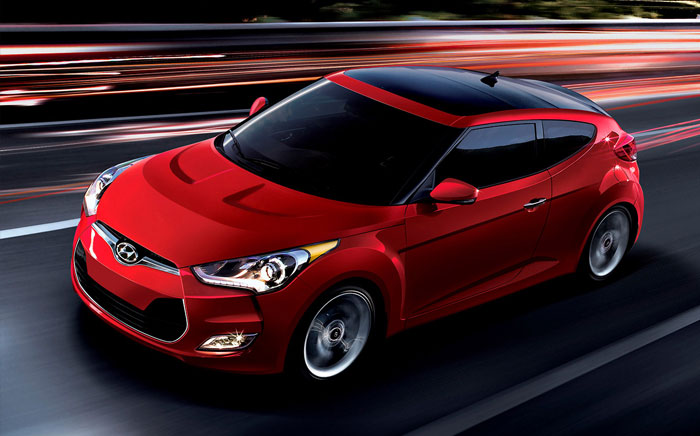

In [0]:
im = cv2.imread("/content/drive/My Drive/remake/matting/main-jpg/Automobile/Hyundai (6).png")
cv2_imshow(im)

In [0]:
cfg = get_cfg()
# Add PointRend-specific config
point_rend.add_pointrend_config(cfg)
# Load a config from file
cfg.merge_from_file("detectron2_repo/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Use a model from PointRend model zoo: https://github.com/facebookresearch/detectron2/tree/master/projects/PointRend#pretrained-models
cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/PointRend/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco/164955410/model_final_3c3198.pkl"
predictor = DefaultPredictor(cfg)

In [0]:
predictor_list = []
for threshold in range(0, 11):
  im = cv2.imread("/content/drive/My Drive/remake/matting/main-jpg/Automobile/Honda (4).png")

  threshold = float(threshold / 10)
  cfg = get_cfg()
  # Add PointRend-specific config
  point_rend.add_pointrend_config(cfg)
  # Load a config from file
  cfg.merge_from_file("detectron2_repo/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco.yaml")
  cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = threshold  # set threshold for this model
  # Use a model from PointRend model zoo: https://github.com/facebookresearch/detectron2/tree/master/projects/PointRend#pretrained-models
  cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/PointRend/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco/164955410/model_final_3c3198.pkl"
  predictor = DefaultPredictor(cfg)
  predictor_list.append(predictor)
  
  
  outputs = predictor(im)
  tensor = outputs['instances'].__getattr__('pred_masks')

  numpy_tensor = tensor.cpu().numpy()
  print(tensor.shape)
  if numpy_tensor.size != 0:
    object_cnt = tensor.shape[0]

  im[:,:,:] = 0

  for i in range(object_cnt):
    numpy_tensor_object = numpy_tensor[i]
    im[np.where(numpy_tensor_object == True)] = 255

  cv2.imwrite("Honda (4)_trimap_thresh_"+str(threshold) + ".png", im)

torch.Size([100, 967, 1780])
torch.Size([2, 967, 1780])
torch.Size([2, 967, 1780])
torch.Size([1, 967, 1780])
torch.Size([1, 967, 1780])
torch.Size([1, 967, 1780])
torch.Size([1, 967, 1780])
torch.Size([1, 967, 1780])
torch.Size([1, 967, 1780])
torch.Size([1, 967, 1780])
torch.Size([0, 967, 1780])


IndexError: ignored

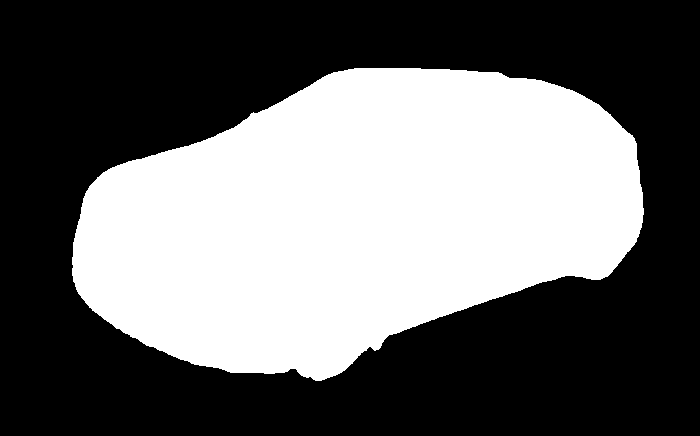

In [0]:
outputs = predictor(im)
tensor = outputs['instances'].__getattr__('pred_masks')

numpy_tensor = tensor.cpu().numpy()

if numpy_tensor.size != 0:
  object_cnt = tensor.shape[0]

im[:,:,:] = 0

for i in range(object_cnt):
  numpy_tensor_object = numpy_tensor[i]
  im[np.where(numpy_tensor_object == True)] = 255

cv2_imshow(im)

In [0]:
im.shape

(596, 900, 3)

In [0]:
def erode_dilate(msk, struc="ELLIPSE", size=(10, 10)):
    if struc == "RECT":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, size)
    elif struc == "CORSS":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, size)
    else:
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size)

    msk = msk.astype(np.float32) / 255.0


    # val in 0 or 255

    dilated = cv2.dilate(msk, kernel, iterations=1) * 255
    eroded = cv2.erode(msk, kernel, iterations=1) * 255

    cnt1 = len(np.where(msk >= 0)[0])
    cnt2 = len(np.where(msk == 0)[0])
    cnt3 = len(np.where(msk == 1)[0])
    # print("all:{} bg:{} fg:{}".format(cnt1, cnt2, cnt3))///
#    assert(cnt1 == cnt2 + cnt3)

    cnt1 = len(np.where(dilated >= 0)[0])
    cnt2 = len(np.where(dilated == 0)[0])
    cnt3 = len(np.where(dilated == 255)[0])
    # print("all:{} bg:{} fg:{}".format(cnt1, cnt2, cnt3))
#    assert(cnt1 == cnt2 + cnt3)

    cnt1 = len(np.where(eroded >= 0)[0])
    cnt2 = len(np.where(eroded == 0)[0])
    cnt3 = len(np.where(eroded == 255)[0])
    #print("all:{} bg:{} fg:{}".format(cnt1, cnt2, cnt3))
#    assert(cnt1 == cnt2 + cnt3)

    res = dilated.copy()
    #res[((dilated == 255) & (msk == 0))] = 128
    res[((dilated == 255) & (eroded == 0))] = 128

    res = res.astype(np.int16)
    return res

In [0]:
def gen_trimap(img, outputs):
  if outputs is None:
    print("None outputs")
  tensor = outputs['instances'].__getattr__('pred_masks')

  numpy_tensor = tensor.cpu().numpy()
  # print("img.shape1 : {}".format(img.shape))
  # print("numpy_tensor.size : {}".format(numpy_tensor.size))

  if numpy_tensor.size != 0:
    object_cnt = tensor.shape[0]
  else:
    return None

  # img[np.where(numpy_tensor == False)] = 0
  # img[np.where(numpy_tensor == True)] = 255
  for i in range(object_cnt):
    numpy_tensor_object = numpy_tensor[i]
    img[np.where(numpy_tensor_object == True)] = 255
  img[np.where(img != 255)] = 0
    # cv2_imshow(img)
    # print("img.shape2 : {}".format(img.shape))

  trimap = erode_dilate(img, size=(10,10))

  # print("img.shape3 : {}".format(img.shape))
  # cv2_imshow(trimap)
  # print("trimap size : {}".format(trimap.shape))
  return trimap

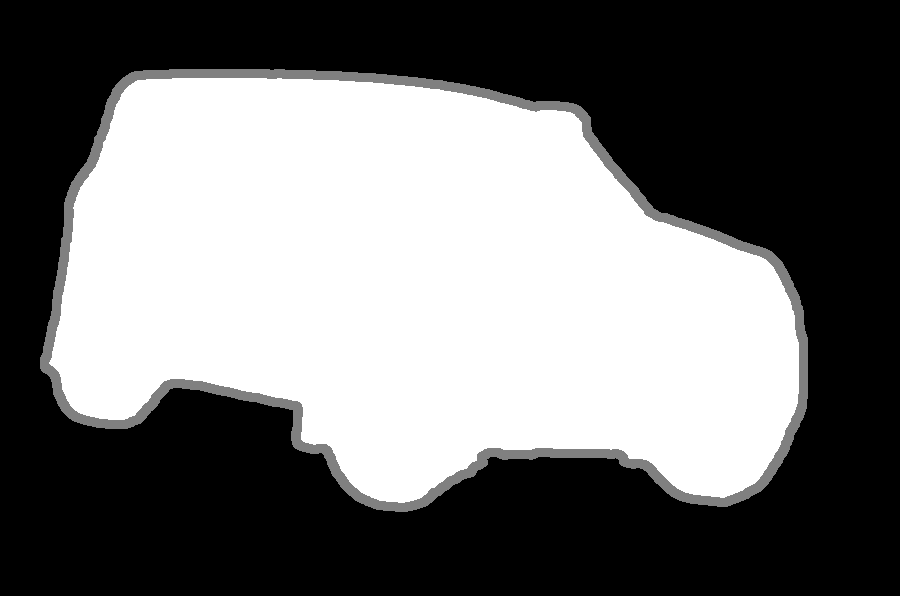

In [0]:
trimap = erode_dilate(im, size=(10,10))
cv2_imshow(trimap)

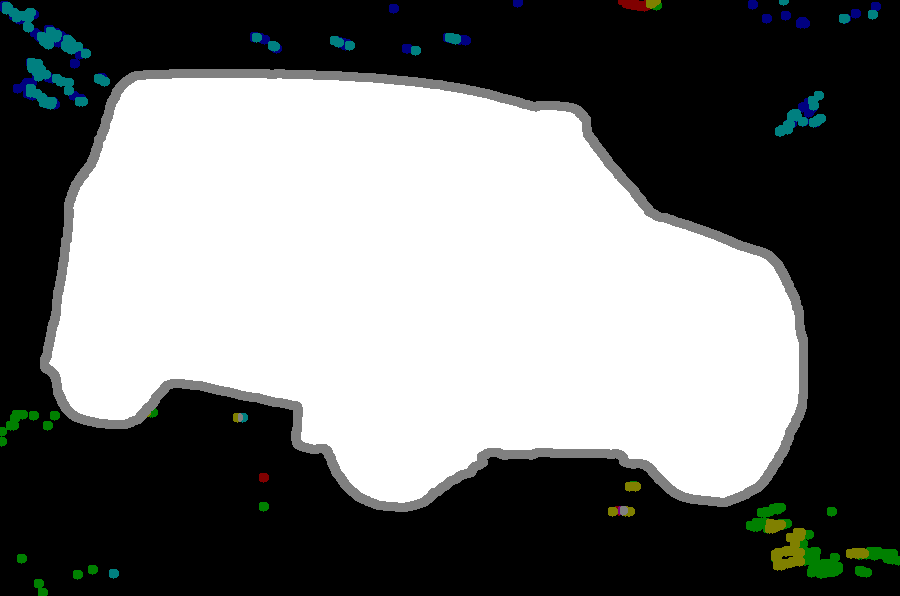

(596, 900, 3)

In [0]:
import numpy as np
import sys

outputs = predictor(im)
trimap = gen_trimap(im, outputs)
cv2.imwrite("./Landrover (19)_trimap.png", trimap)
cv2_imshow(trimap)
# np.set_printoptions(threshold=sys.maxsize)
trimap.shape

# try:
#   scale = 1.0
#   image = load_image("/content/drive/My Drive/remake/matting/main-jpg/Automobile/Landrover (19).png", "RGB", scale, "box")

#   trimap = load_image("./Landrover (19)_trimap.png", "GRAY", scale, "nearest")

#   alpha = estimate_alpha_cf(image, trimap, laplacian_kwargs={"epsilon": 1e-1}, cg_kwargs= {"maxiter":3000})
#   # alpha = estimate_alpha_cf(image, trimap)

#   background = np.zeros(image.shape)
#   background[:, :] = [0.5, 0.5, 0.5]

#   foreground = estimate_foreground_ml(image, alpha)

#   new_image = blend(foreground, background, alpha)

#   cutout = stack_images(foreground, alpha)
#   save_image(cutout_path, cutout)
# except ValueError as e:
#   print(e)

In [0]:
outputs = predictor(im)
tensor = outputs['instances'].__getattr__('pred_masks')
type(tensor)
numpy_tensor = tensor.cpu().numpy()
numpy_tensor.shape

(1, 596, 900)

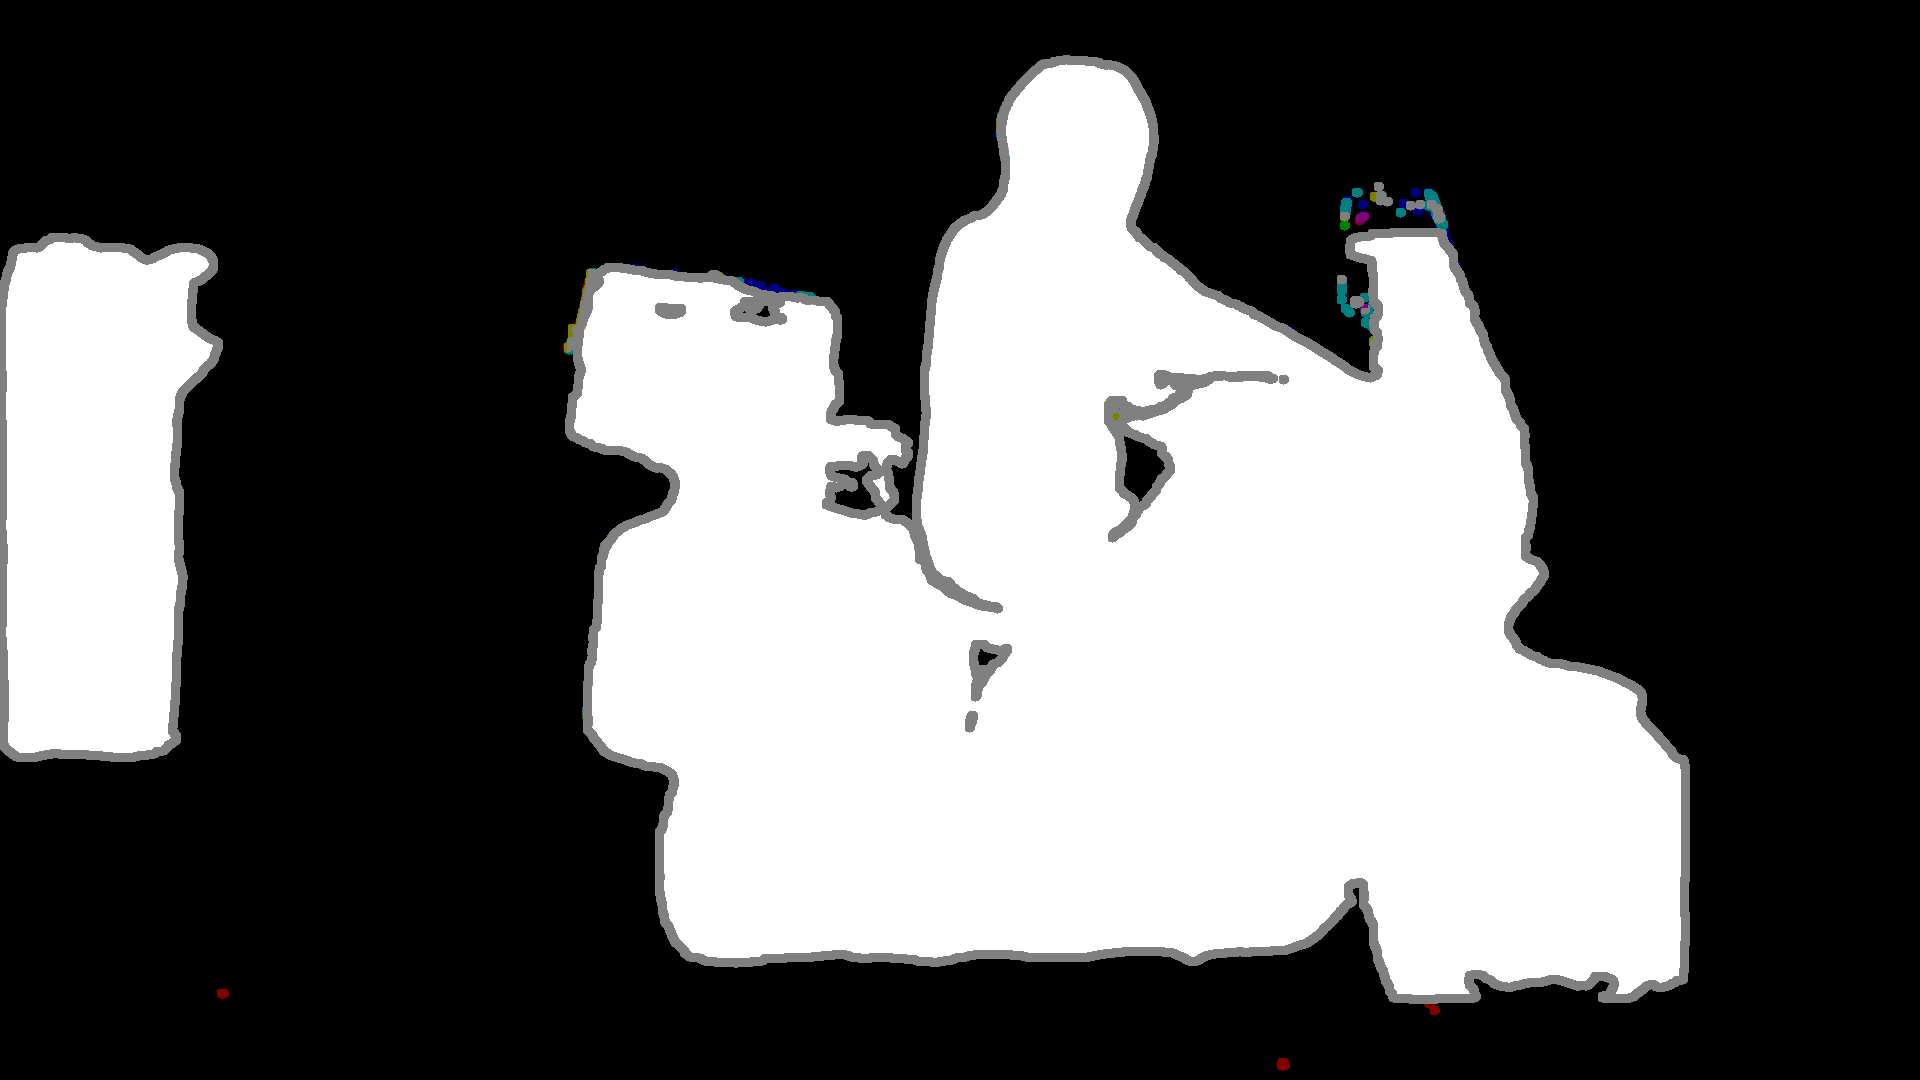

In [0]:
tensor = outputs['instances'].__getattr__('pred_masks')

numpy_tensor = tensor.cpu().numpy()
# print("img.shape1 : {}".format(img.shape))
# print("numpy_tensor.size : {}".format(numpy_tensor.size))

if numpy_tensor.size != 0:
  object_cnt = tensor.shape[0]
  
for i in range(object_cnt):
  numpy_tensor_object = numpy_tensor[i]
  im[np.where(numpy_tensor_object == True)] = 255
im[np.where(im != 255)] = 0
  # cv2_imshow(img)
  # print("img.shape2 : {}".format(img.shape))

trimap = erode_dilate(im, size=(10,10))
# print("img.shape3 : {}".format(img.shape))
# cv2_imshow(trimap)
# print("trimap size : {}".format(trimap.shape))
cv2_imshow(trimap)

In [0]:
numpy_tensor[0].shape

(1152, 2048)

In [0]:
tensor = outputs['instances'].__getattr__('pred_masks')
type(tensor)
numpy_tensor = tensor.cpu().numpy()
numpy_tensor.shape
numpy_tensor = numpy_tensor[0]
numpy_tensor.shape

(1152, 2048)

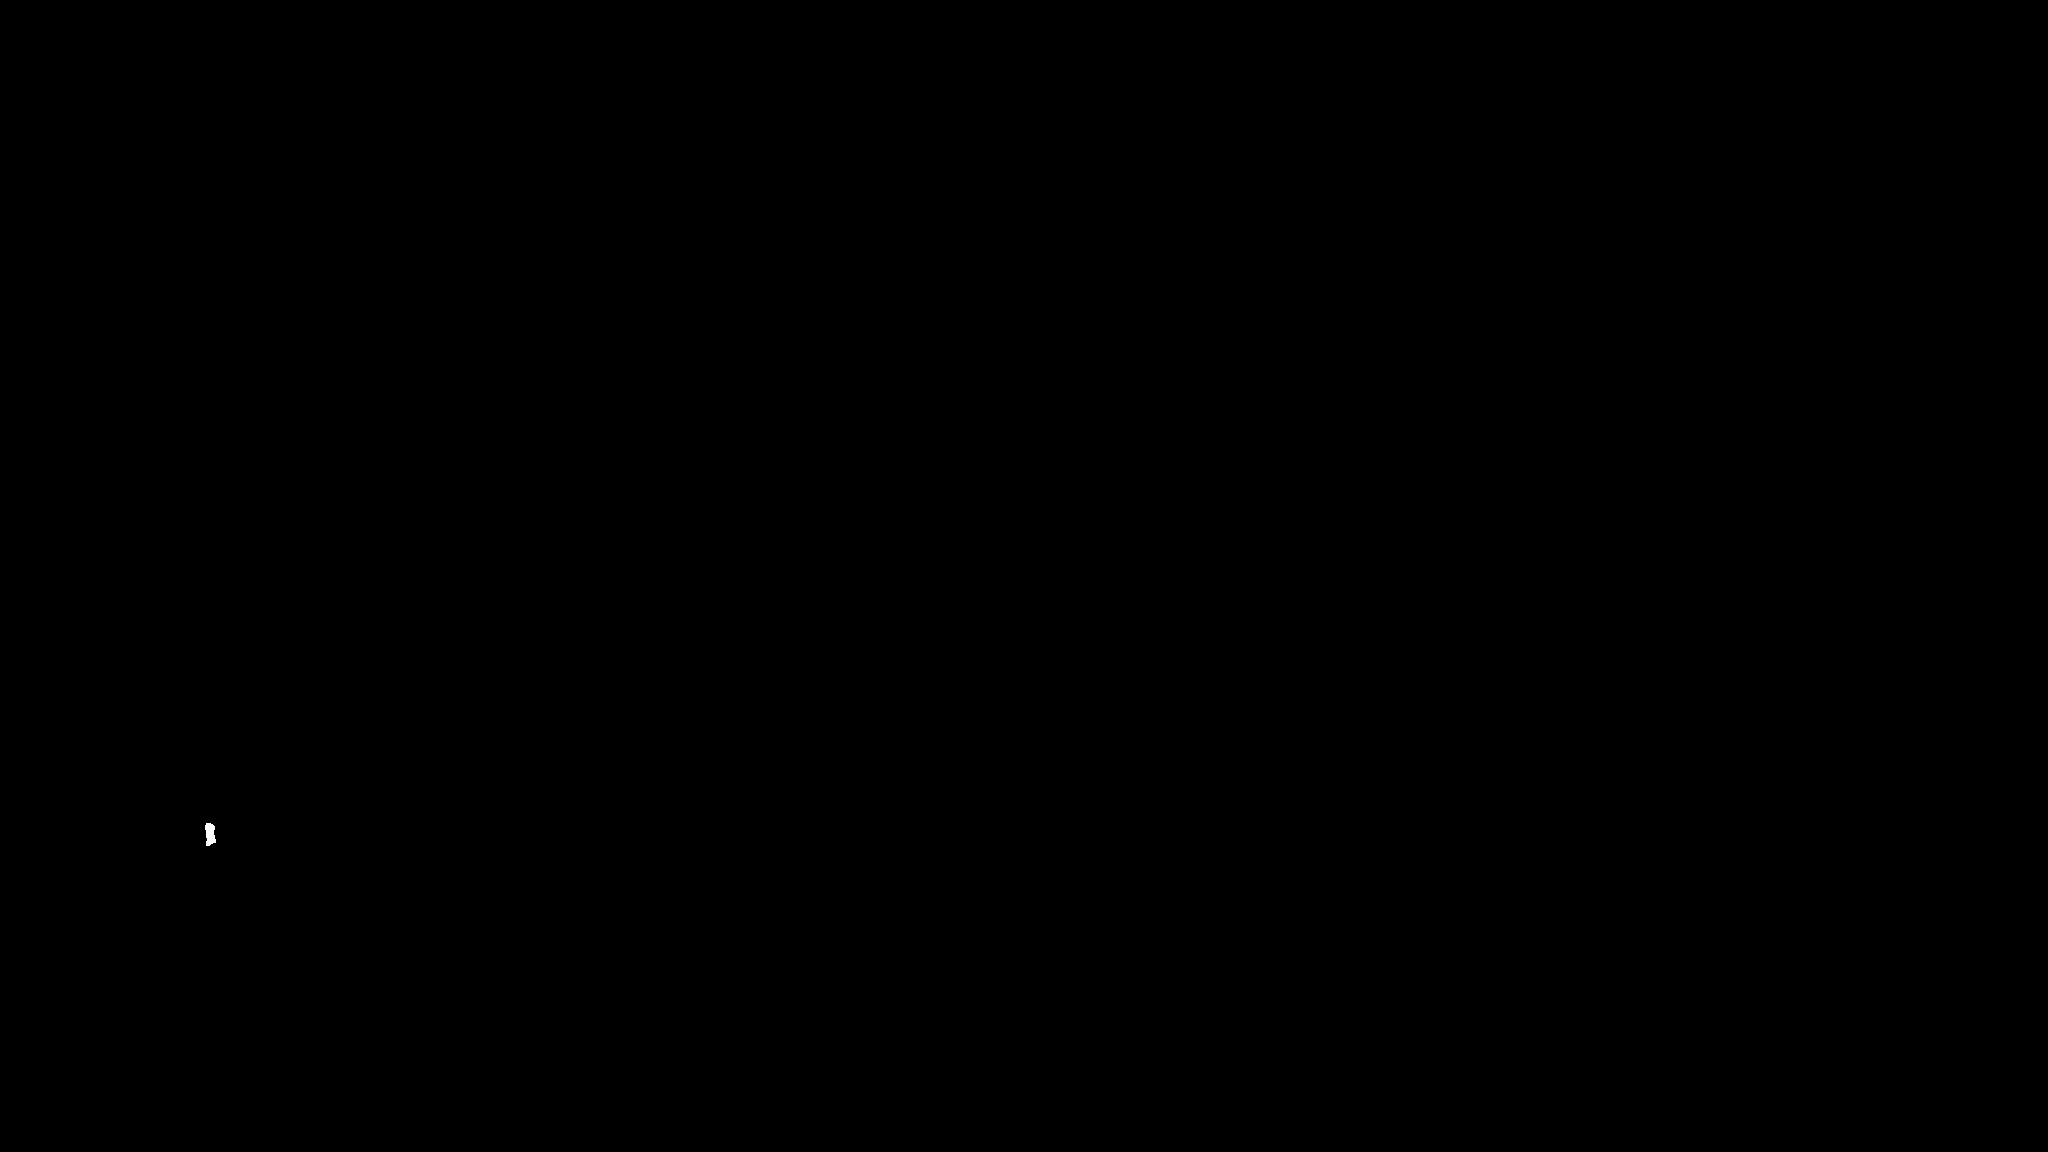

In [0]:
tensor = outputs['instances'].__getattr__('pred_masks')
type(tensor)
numpy_tensor = tensor.cpu().numpy()
numpy_tensor.shape
# numpy_tensor = numpy_tensor.reshape(600,575)
numpy_tensor = numpy_tensor[0]
im[np.where(numpy_tensor == False)] = 0
im[np.where(numpy_tensor == True)] = 255
im
cv2_imshow(im)


all:7077888 bg:7077318 fg:570
all:7077888 bg:7076256 fg:1632


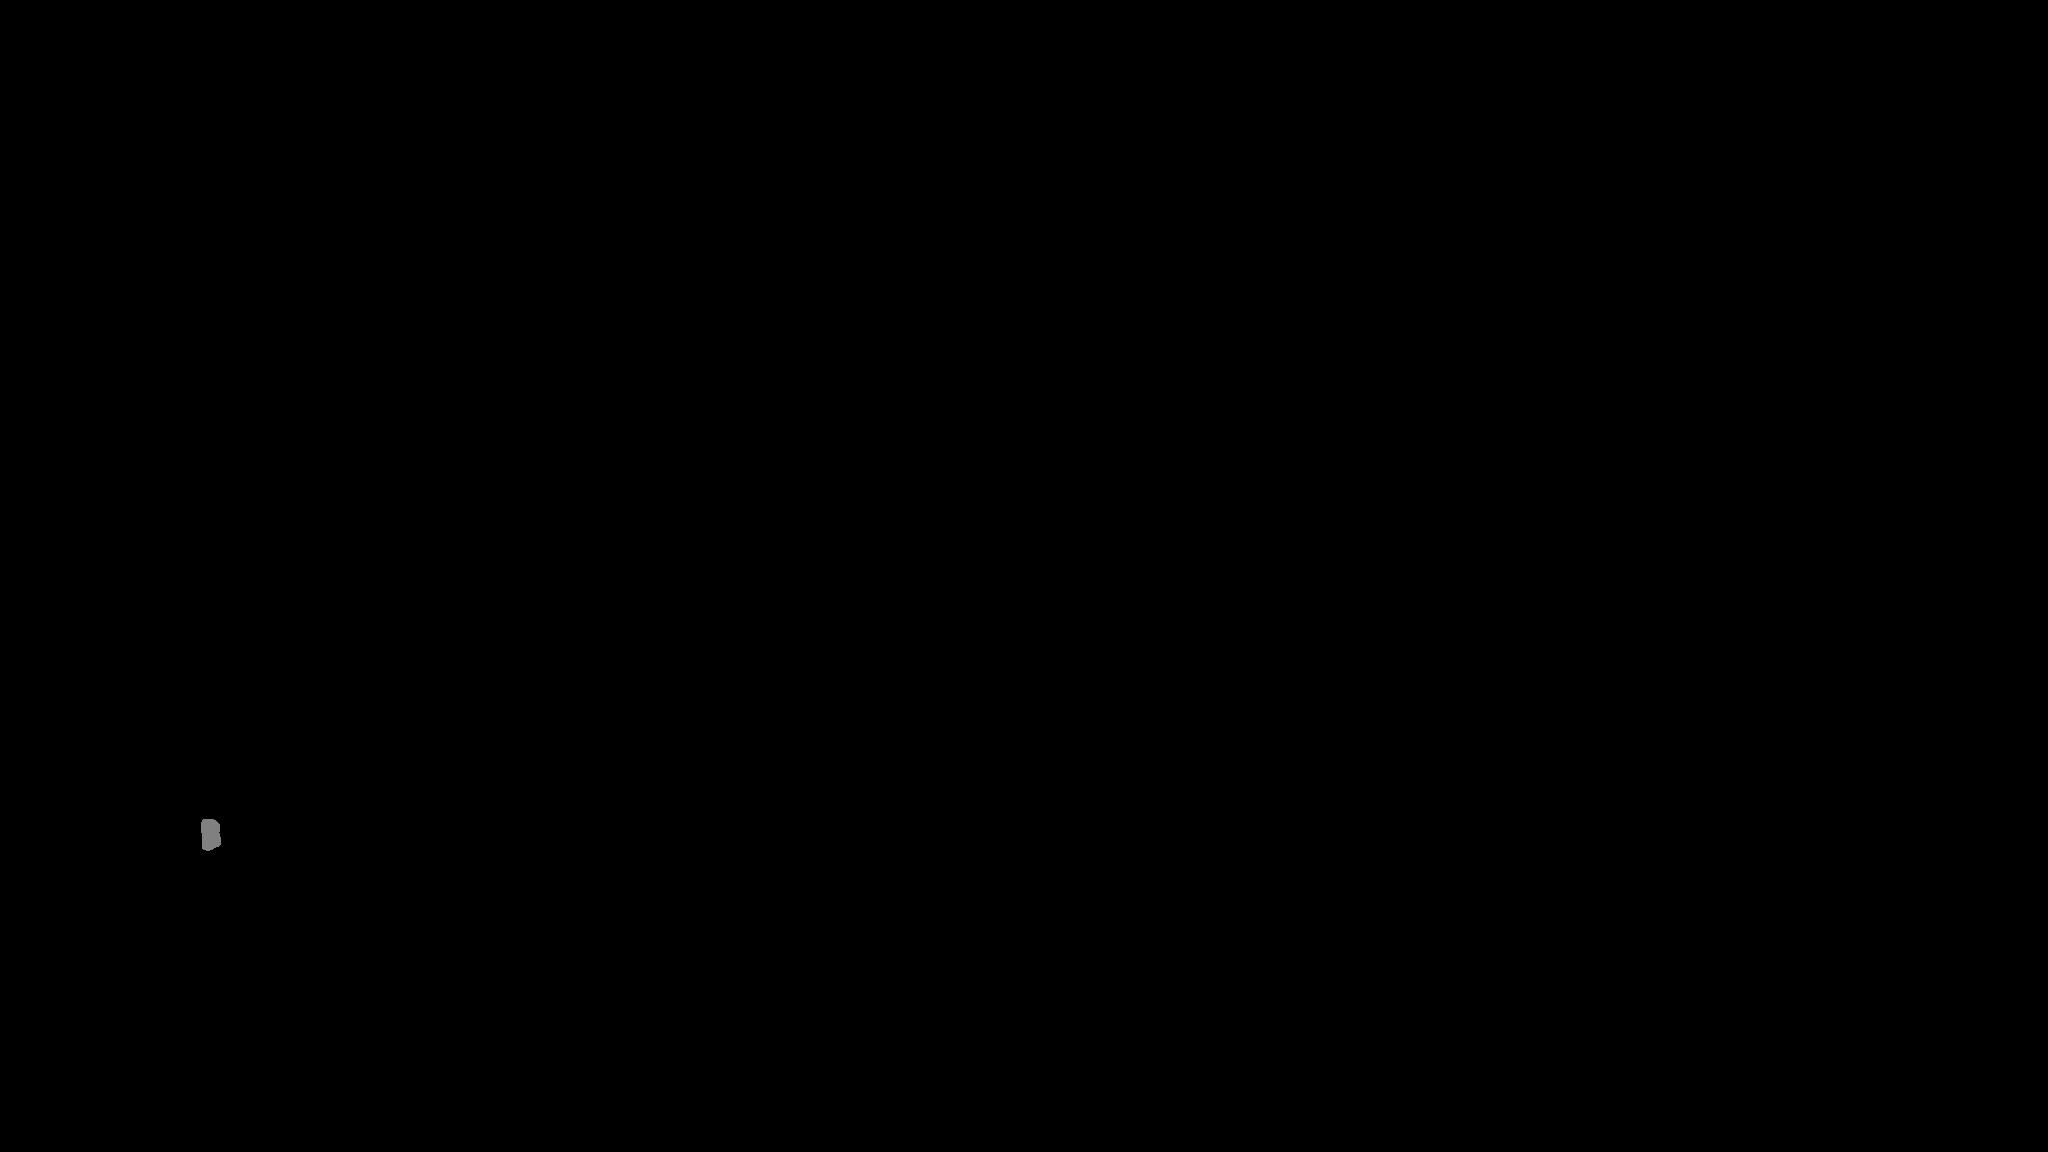

True

In [0]:
def erode_dilate(msk, struc="ELLIPSE", size=(10, 10)):
    if struc == "RECT":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, size)
    elif struc == "CORSS":
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, size)
    else:
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size)

    msk = msk.astype(np.float32) / 255.0


    # val in 0 or 255

    dilated = cv2.dilate(msk, kernel, iterations=1) * 255
    eroded = cv2.erode(msk, kernel, iterations=1) * 255

    cnt1 = len(np.where(msk >= 0)[0])
    cnt2 = len(np.where(msk == 0)[0])
    cnt3 = len(np.where(msk == 1)[0])
    print("all:{} bg:{} fg:{}".format(cnt1, cnt2, cnt3))
#    assert(cnt1 == cnt2 + cnt3)

    cnt1 = len(np.where(dilated >= 0)[0])
    cnt2 = len(np.where(dilated == 0)[0])
    cnt3 = len(np.where(dilated == 255)[0])
    print("all:{} bg:{} fg:{}".format(cnt1, cnt2, cnt3))
#    assert(cnt1 == cnt2 + cnt3)

    cnt1 = len(np.where(eroded >= 0)[0])
    cnt2 = len(np.where(eroded == 0)[0])
    cnt3 = len(np.where(eroded == 255)[0])
    #print("all:{} bg:{} fg:{}".format(cnt1, cnt2, cnt3))
#    assert(cnt1 == cnt2 + cnt3)

    res = dilated.copy()
    #res[((dilated == 255) & (msk == 0))] = 128
    res[((dilated == 255) & (eroded == 0))] = 128

    return res

trimap = erode_dilate(im, size=(10,10)) # generate trimap
cv2_imshow(trimap)
trimap.shape
cv2.imwrite("Honda_trimap.png", trimap)

In [0]:
!pip3 install pymatting
from pymatting import cutout

cutout(
    # input image path
    "/content/drive/My Drive/remake/matting/main-jpg/Automobile/Honda (3).png",
    # input trimap path
    "/content/drive/My Drive/remake/matting/trimap/Automobile/Honda (3).png",
    # output cutout path
    "Honda (3).png"
)

In [0]:
coco_metadata

Metadata(evaluator_type='coco', image_root='datasets/coco/val2017', json_file='datasets/coco/annotations/instances_val2017.json', name='coco_2017_val', thing_classes=['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 

In [0]:
np.set_printoptions(threshold=sys.maxsize)
torch.set_printoptions(threshold=sys.maxsize)
outputs['instances']

NameError: ignored

# "[PointRend](https://arxiv.org/abs/1912.08193) in Detectron2" Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to the [PointRend project](https://github.com/facebookresearch/detectron2/tree/master/projects/PointRend) in detectron2! In this tutorial, we will go through some basics usage of PointRend, including the following:
* Run inference on images or videos, with an existing PointRend model
* Look into PointRend internal representation.

You can make a copy of this tutorial or use "File -> Open in playground mode" to play with it yourself.


We first download an image from the COCO dataset:

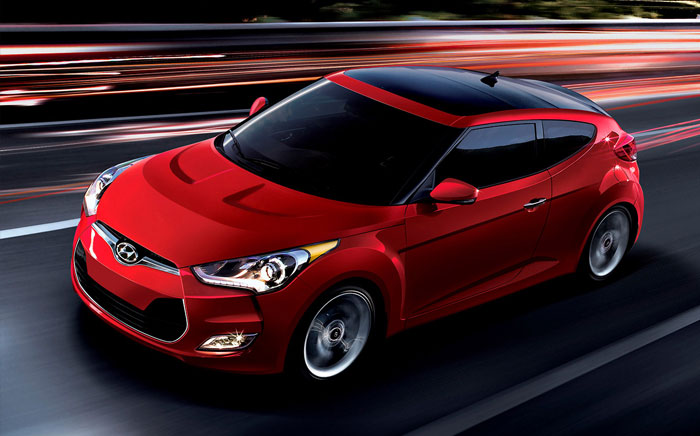

In [0]:
im = cv2.imread("/content/drive/My Drive/remake/matting/main-jpg/Automobile/Hyundai (6).png")
cv2_imshow(im)

Then, we create a detectron2 config and a detectron2 DefaultPredictor to run inference on this image. First, we make a prediction using a standard Mask R-CNN model.

In [0]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
mask_rcnn_predictor = DefaultPredictor(cfg)
mask_rcnn_outputs = mask_rcnn_predictor(im)

model_final_f10217.pkl: 178MB [00:02, 69.5MB/s]                           


Now, we load a PointRend model and show its prediction.

In [0]:
cfg = get_cfg()
# Add PointRend-specific config
point_rend.add_pointrend_config(cfg)
# Load a config from file
cfg.merge_from_file("detectron2_repo/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Use a model from PointRend model zoo: https://github.com/facebookresearch/detectron2/tree/master/projects/PointRend#pretrained-models
cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/PointRend/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco/164955410/model_final_3c3198.pkl"
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [0]:
outputs

{'instances': Instances(num_instances=1, image_height=436, image_width=700, fields=[pred_boxes: Boxes(tensor([[ 61.5406,  57.6060, 664.1425, 387.7724]], device='cuda:0')), scores: tensor([0.9780], device='cuda:0'), pred_classes: tensor([2], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]]], device='cuda:0')])}

In [0]:
tensor = outputs['instances'].__getattr__('pred_masks')
type(tensor.shape)
tensor.shape[0]

1

Mask R-CNN with PointRend (top)     vs.     Default Mask R-CNN (bottom)


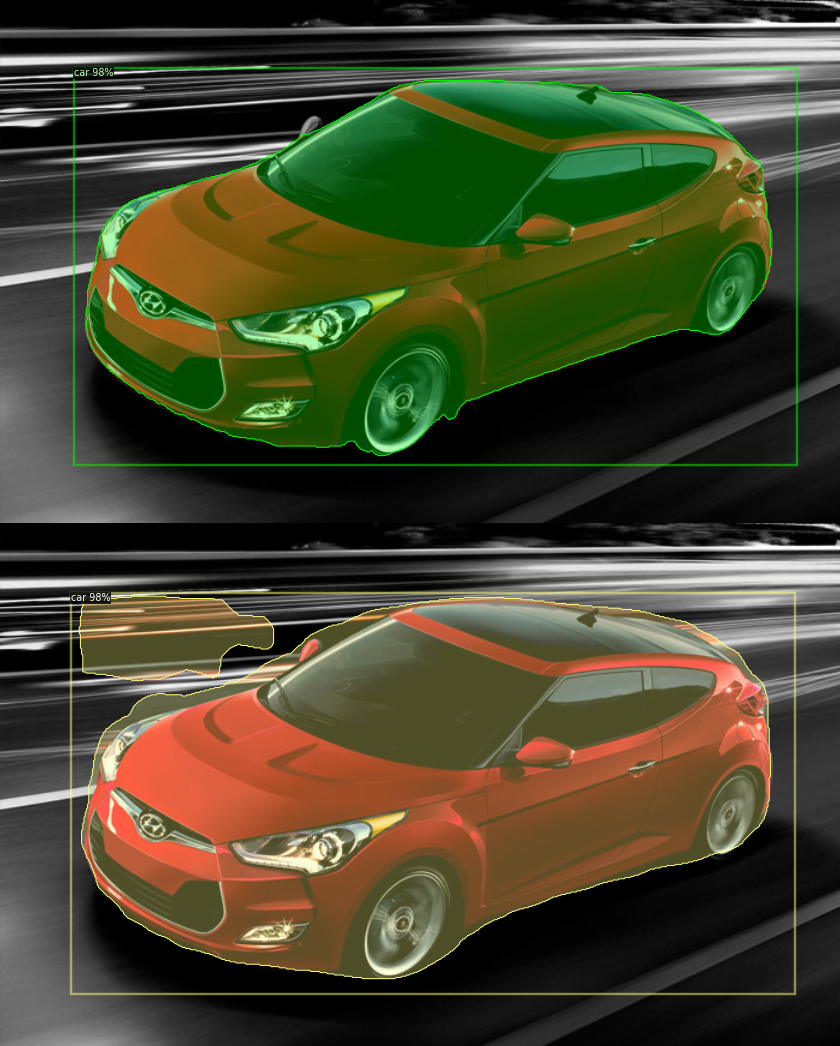

In [0]:
# Show and compare two predictions: 
v = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
mask_rcnn_result = v.draw_instance_predictions(mask_rcnn_outputs["instances"].to("cpu")).get_image()
v = Visualizer(im[:, :, ::-1], coco_metadata, scale=1.2, instance_mode=ColorMode.IMAGE_BW)
point_rend_result = v.draw_instance_predictions(outputs["instances"].to("cpu")).get_image()
print("Mask R-CNN with PointRend (top)     vs.     Default Mask R-CNN (bottom)")
cv2_imshow(np.concatenate((point_rend_result, mask_rcnn_result), axis=0)[:, :, ::-1])

# Pymatting

### simple usage

In [0]:
!pip3 install pymatting
from pymatting import cutout

def gen_matted_image(img_path, trimap_path, cutout_path):
  try:
    cutout(
        # input image path
        img_path,
        # input trimap path
        trimap_path,
        # output cutout path
        cutout_path
    )
    return "success"
  except ValueError as e:
    return e

### Advanced Usage

In [0]:
from pymatting import *
import numpy as np

scale = 1.0
image_name = 'Hyundai (6).png'
image = load_image("/content/drive/My Drive/remake/matting/main-jpg/Automobile/" + image_name, "RGB", scale, "box")
# image = load_image("/content/drive/My Drive/remake/matting/main-jpg/Automobile/" + image_name, "RGB", scale, "box")

trimap = load_image("/content/drive/My Drive/remake/matting/trimap/Automobile/" + image_name, "GRAY", scale, "nearest")
# trimap = load_image("/content/drive/My Drive/remake/matting/trimap/Automobile/" + image_name, "GRAY", scale, "nearest")

value = 1e-5
alpha = estimate_alpha_cf(image, trimap, laplacian_kwargs={"epsilon": value}, cg_kwargs= {"maxiter":3000})
# alpha = estimate_alpha_cf(image, trimap)

value2 = 0.6
foreground= estimate_foreground_ml(image, alpha, regularization = value2)

cutout = stack_images(foreground, alpha)
save_image("/content/drive/My Drive/remake/matting/pymatting_image/" + image_name[:-4] + "_cutout_" + str(value) + "_" + str(value2) + ".png", cutout)


In [0]:
!pip3 install pymatting
from pymatting import *
import numpy as np

scale = 1.0
image_name = 'Hyundai (6).png'
image = load_image("/content/drive/My Drive/remake/matting/main-jpg/Automobile/" + image_name, "RGB", scale, "box")
# image = load_image("/content/drive/My Drive/remake/matting/main-jpg/Automobile/" + image_name, "RGB", scale, "box")

trimap = load_image("/content/drive/My Drive/remake/matting/trimap/Automobile/" + image_name, "GRAY", scale, "nearest")
# trimap = load_image("/content/drive/My Drive/remake/matting/trimap/Automobile/" + image_name, "GRAY", scale, "nearest")


# alpha = estimate_alpha_cf(image, trimap, laplacian_kwargs={"epsilon": 1e-3}, cg_kwargs= {"maxiter":3000})

for square_value in range(1, 8):
  
  value = float(10**(-square_value))
  alpha = estimate_alpha_cf(image, trimap, laplacian_kwargs={"epsilon": value}, cg_kwargs= {"maxiter":3000})

  for square_value in range(1, 8):
    value2 = float(10**(-square_value))
  # alpha = estimate_alpha_cf(image, trimap)
  # background = np.zeros(image.shape)
  # background[:, :] = [0.5, 0.5, 0.5]
  # image.shape

    foreground= estimate_foreground_ml(image, alpha, regularization = value2)

  # new_image = blend(foreground, background, alpha)

  # new_image

  # images = [image, trimap, alpha, new_image]
  # grid = make_grid(images)
  # save_image("/content/drive/My Drive/remake/matting/pymatting_image/" + image_name[:-4] + "_grid_" + str(value) + ".png", grid)

    cutout = stack_images(foreground, alpha)
    save_image("/content/drive/My Drive/remake/matting/pymatting_image/" + image_name[:-4] + "_cutout_" + str(value) + "_" + str(value2) + ".png", cutout)
  
  # color_bleeding = blend(image, background, alpha)
  # grid = make_grid([color_bleeding, new_image])
  # save_image("/content/drive/My Drive/remake/matting/pymatting_image/"  + image_name[:-4] + "_color_bleeding2.png", grid)
  # type(cutout)

     |████████████████████████████████| 40kB 1.9MB/s 


In [0]:
background = np.zeros(image.shape)
background[:, :] = [0.5, 0.5, 0.5]
image.shape

foreground = estimate_foreground_ml(image, alpha)

new_image = blend(foreground, background, alpha)

new_image

# images = [image, trimap, alpha, new_image]
# grid = make_grid(images)
# save_image("/content/drive/My Drive/remake/matting/pymatting_image/" + image_name[:-4] + "_grid_" + str(value) + ".png", grid)

cutout = stack_images(foreground, alpha)
save_image("/content/drive/My Drive/remake/matting/pymatting_image/" + image_name[:-4] + "_cutout_" + str(value) + ".png", cutout)
save_image("/content/drive/My Drive/remake/matting/pymatting_image/" + image_name[:-4] + "_new_image_" + str(value) + ".png", new_image)

# color_bleeding = blend(image, background, alpha)
# grid = make_grid([color_bleeding, new_image])
# save_image("/content/drive/My Drive/remake/matting/pymatting_image/"  + image_name[:-4] + "_color_bleeding2.png", grid)
type(cutout)

numpy.ndarray

### Expert Usage

In [0]:
from pymatting import *
import numpy as np
import scipy.sparse

scale = 1.0

image = load_image("/content/drive/My Drive/remake/matting/main-jpg/Automobile/Hyundai (6).png", "RGB", scale, "box")
trimap = load_image("/content/drive/My Drive/remake/matting/trimap/Automobile/Hyundai (6).png", "GRAY", scale, "nearest")

h, w = trimap.shape[:2]


is_fg, is_bg, is_known, is_unknown = trimap_split(trimap)

# constraint weight
lambda_value = 100.0     #   need to know closed form alpha matting reading the paper.

#build constraint pixel selection matrix
c = lambda_value * is_known
C = scipy.sparse.diags(c)

# build constraint value vector
b = lambda_value * is_fg


# for r in range(1, 6):
#   L = cf_laplacian(image, epsilon=1e-3, radius = r)

L = cf_laplacian(image, epsilon = 1e-3, radius = 1)

# L = cf_laplacian(image, epsilon = 1e-3, radius = 2)
# L = cf_laplacian(image, epsilon = 1e-3, radius = 3)
# L = cf_laplacian(image, epsilon = 1e-3, radius = 4)
# L = cf_laplacian(image, epsilon = 1e-3, radius = 5)

#build linear system
A = L + C

# build ichol preconditioner for faster convergence.
A = A.tocsr()
A.sum_duplicates()
M = ichol(A)

# solve linear system with conjugate gradient descent
x = cg(A, b, M=M)


# clip and reshape result vector
alpha = np.clip(x, 0.0, 1.0).reshape(h, w)

  # save_image("Hyundai (6)_" + str(r) + "_alpha.png", alpha)
save_image("Hyundai (6)_alpha.png", alpha)

foreground = estimate_foreground_ml(image, alpha, regularization= 0.55)
cutout = stack_images(foreground, alpha)

save_image("Hyundai (6)_cutout.png", cutout)
  # save_image("Hyundai (6)_" + str(r) + "_cutout.png", cutout)

### Try adjusting values in pymatting 

In [0]:
!pip3 install pymatting
from pymatting import *
import numpy as np

scale = 1.0
image_name = 'Hyundai (6).png'
image = load_image("/content/drive/My Drive/remake/matting/main-jpg/Automobile/" + image_name, "RGB", scale, "box")
# image = load_image("/content/drive/My Drive/remake/matting/main-jpg/Automobile/" + image_name, "RGB", scale, "box")

trimap = load_image("/content/drive/My Drive/remake/matting/trimap/Automobile/" + image_name, "GRAY", scale, "nearest")
# trimap = load_image("/content/drive/My Drive/remake/matting/trimap/Automobile/" + image_name, "GRAY", scale, "nearest")

value = 1e-1
alpha = estimate_alpha_cf(image, trimap, laplacian_kwargs={"epsilon": value}, cg_kwargs= {"maxiter":3000})
# alpha = estimate_alpha_cf(image, trimap)

# background = np.zeros(image.shape)
# background[:, :] = [0.5, 0.5, 0.5]
image.shape

value2 = 1e-4
foreground= estimate_foreground_ml(image, alpha, regularization = value2)

new_image = blend(foreground, background, alpha)

new_image

# images = [image, trimap, alpha, new_image]
# grid = make_grid(images)
# save_image("/content/drive/My Drive/remake/matting/pymatting_image/" + image_name[:-4] + "_grid_" + str(value) + ".png", grid)

cutout = stack_images(foreground, alpha)
save_image("/content/drive/My Drive/remake/matting/pymatting_image/" + image_name[:-4] + "_cutout_" + str(value) + str(value2) + ".png", cutout)
# save_image("/content/drive/My Drive/remake/matting/pymatting_image/" + image_name[:-4] + "_new_image_" + str(value) + ".png", new_image)

# color_bleeding = blend(image, background, alpha)
# grid = make_grid([color_bleeding, new_image])
# save_image("/content/drive/My Drive/remake/matting/pymatting_image/"  + image_name[:-4] + "_color_bleeding2.png", grid)
type(cutout)

numpy.ndarray

In [0]:
!pip3 install pymatting
from pymatting import *
import numpy as np

def gen_matted_image(img_path, trimap_path, cutout_path):
  image = load_image(img_path, "RGB", scale, "box")

  trimap = load_image(trimap_path, "GRAY", scale, "nearest")
  
  alpha = estimate_alpha_cf(image, trimap, laplacian_kwargs={"epsilon": 1e-1}, cg_kwargs= {"maxiter":3000})
  # alpha = estimate_alpha_cf(image, trimap)

  background = np.zeros(image.shape)
  background[:, :] = [0.5, 0.5, 0.5]

  foreground = estimate_foreground_ml(image, alpha)

  new_image = blend(foreground, background, alpha)

  cutout = stack_images(foreground, alpha)
  save_image(cutout_path, cutout)

# Visualize PointRend point sampling process

In this section we show how PointRend's point sampling process works. To do this, we need to access intermediate representations of the predictor `model.forward(...)` function. Thus, we run forward step manually copying the code step by step.

In [0]:
# First we define a simple function to help us plot the intermediate representations.
import matplotlib.pyplot as plt

def plot_mask(mask, title="", point_coords=None, figsize=10, point_marker_size=5):
  '''
  Simple plotting tool to show intermediate mask predictions and points 
  where PointRend is applied.
  
  Args:
    mask (Tensor): mask prediction of shape HxW
    title (str): title for the plot
    point_coords ((Tensor, Tensor)): x and y point coordinates
    figsize (int): size of the figure to plot
    point_marker_size (int): marker size for points
  '''

  H, W = mask.shape
  plt.figure(figsize=(figsize, figsize))
  if title:
    title += ", "
  plt.title("{}resolution {}x{}".format(title, H, W), fontsize=30)
  plt.ylabel(H, fontsize=30)
  plt.xlabel(W, fontsize=30)
  plt.xticks([], [])
  plt.yticks([], [])
  plt.imshow(mask, interpolation="nearest", cmap=plt.get_cmap('gray'))
  if point_coords is not None:
    plt.scatter(x=point_coords[0], y=point_coords[1], color="red", s=point_marker_size, clip_on=True) 
  plt.xlim(-0.5, W - 0.5)
  plt.ylim(H - 0.5, - 0.5)
  plt.show()

With `predictor` and `im` loaded in the previous section we run backbone, bounding box prediction, and coarse mask segmenation head. We visualize mask prediction for the foreground plane on the image.

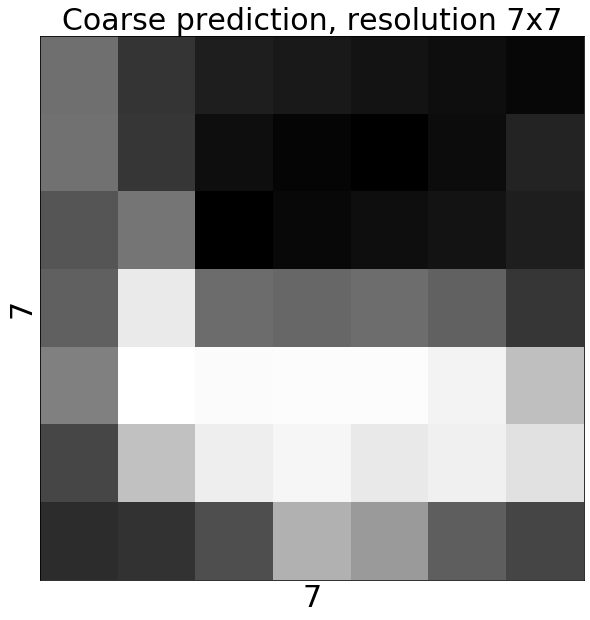

In [0]:
model = predictor.model
# In this image we detect several objects but show only the first one.
instance_idx = 0
# Mask predictions are class-specific, "plane" class has id 4.
category_idx = 4

with torch.no_grad():
  # Prepare input image.
  height, width = im.shape[:2]
  im_transformed = predictor.transform_gen.get_transform(im).apply_image(im)
  batched_inputs = [{"image": torch.as_tensor(im_transformed).permute(2, 0, 1)}]

  # Get bounding box predictions first to simplify the code.
  detected_instances = [x["instances"] for x in model.inference(batched_inputs)]
  [r.remove("pred_masks") for r in detected_instances]  # remove existing mask predictions
  pred_boxes = [x.pred_boxes for x in detected_instances] 


  # Run backbone.
  images = model.preprocess_image(batched_inputs)
  features = model.backbone(images.tensor)
  
  # Given the bounding boxes, run coarse mask prediction head.
  mask_coarse_logits = model.roi_heads._forward_mask_coarse(features, pred_boxes)

  plot_mask(
      mask_coarse_logits[instance_idx, category_idx].to("cpu"),
      title="Coarse prediction"
  )


In [0]:
# Prepare features maps to use later
mask_features_list = [
  features[k] for k in model.roi_heads.mask_point_in_features
]
features_scales = [
  model.roi_heads._feature_scales[k] 
  for k in model.roi_heads.mask_point_in_features
]

### Point sampling during training

During training we select points where coarse prediction is uncertain to train PointRend head. See section 3.1 in the PointRend [paper](https://arxiv.org/abs/1912.08193) for more details.

To visualize different sampling strategy change `oversample_ratio` and `importance_sample_ratio` parameters below.

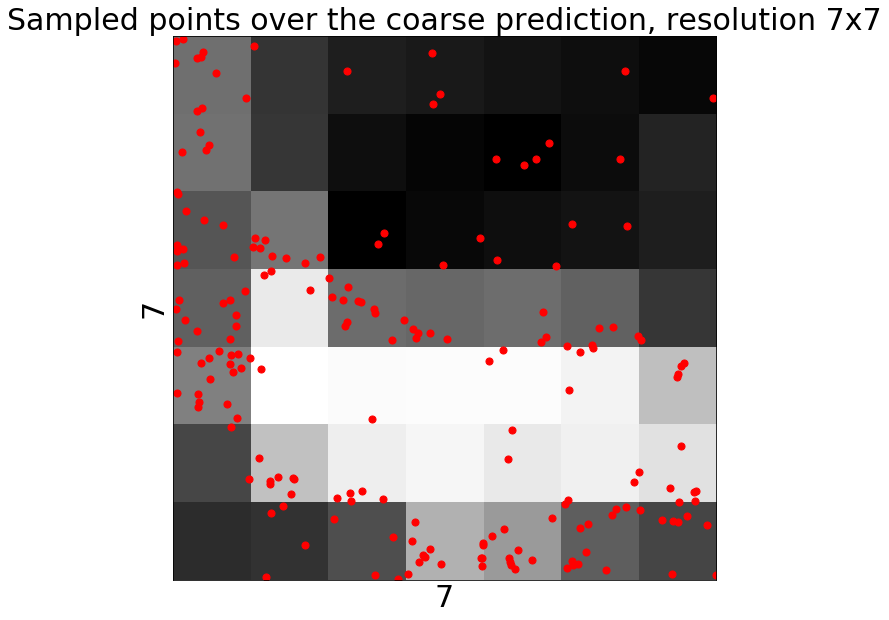

In [0]:
from point_rend.roi_heads import calculate_uncertainty
from point_rend.point_features import get_uncertain_point_coords_with_randomness

# Change number of points to select
num_points = 14 * 14
# Change randomness parameters 
oversample_ratio = 3  # `k` in the paper
importance_sample_ratio = 0.75  # `\beta` in the paper

with torch.no_grad():
  # We take predicted classes, whereas during real training ground truth classes are used.
  pred_classes = torch.cat([x.pred_classes for x in detected_instances])

  # Select points given a corse prediction mask
  point_coords = get_uncertain_point_coords_with_randomness(
    mask_coarse_logits,
    lambda logits: calculate_uncertainty(logits, pred_classes),
    num_points=num_points,
    oversample_ratio=oversample_ratio,
    importance_sample_ratio=importance_sample_ratio
  )

  H, W = mask_coarse_logits.shape[-2:]
  plot_mask(
    mask_coarse_logits[instance_idx, category_idx].to("cpu"),
    title="Sampled points over the coarse prediction",
    point_coords=(
      W * point_coords[instance_idx, :, 0].to("cpu") - 0.5,
      H * point_coords[instance_idx, :, 1].to("cpu") - 0.5
    ),
    point_marker_size=50
  )

### Point sampling during inference

Starting from a 7x7 coarse prediction we bilinearly upsample it `num_subdivision_steps` times. At each step we find `num_subdivision_points` most uncertain points and make predictions for them using the PointRend head. See section 3.1 in the [paper](https://arxiv.org/abs/1912.08193) to know more details.

Change `num_subdivision_steps` and `num_subdivision_points` parameters to change inference behavior.

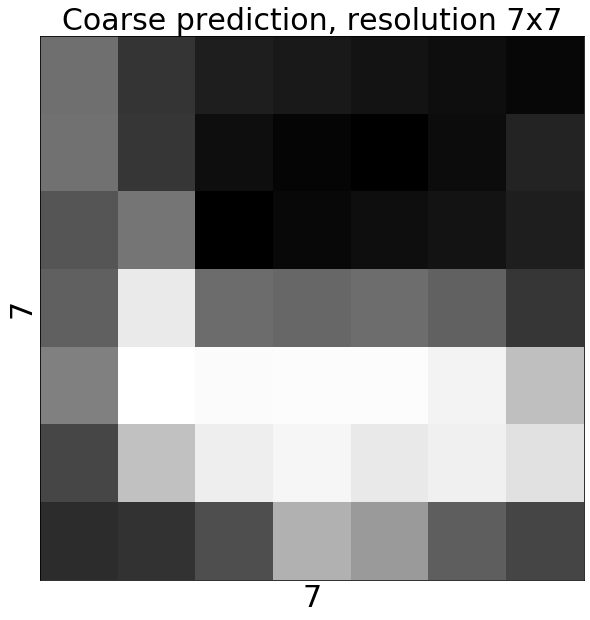

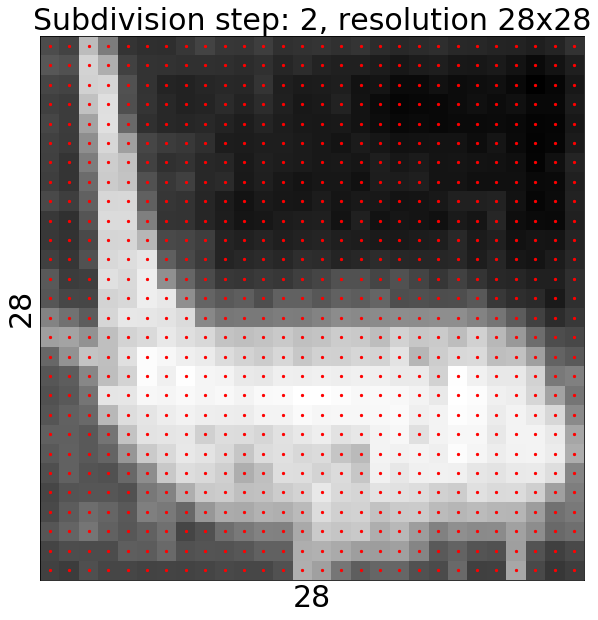

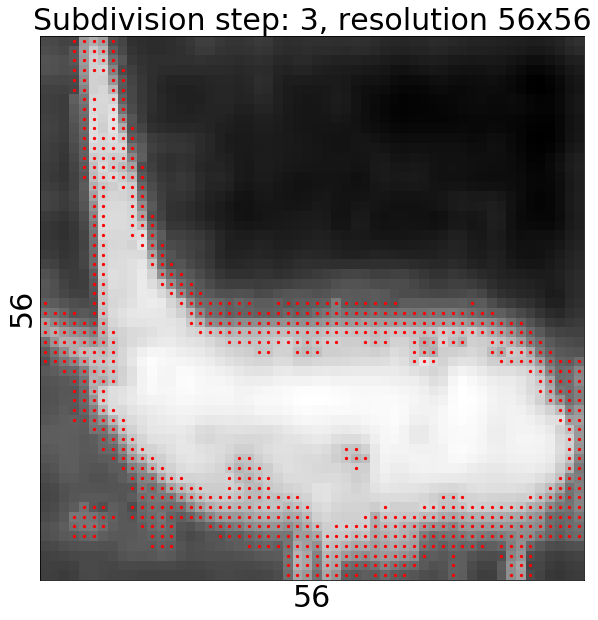

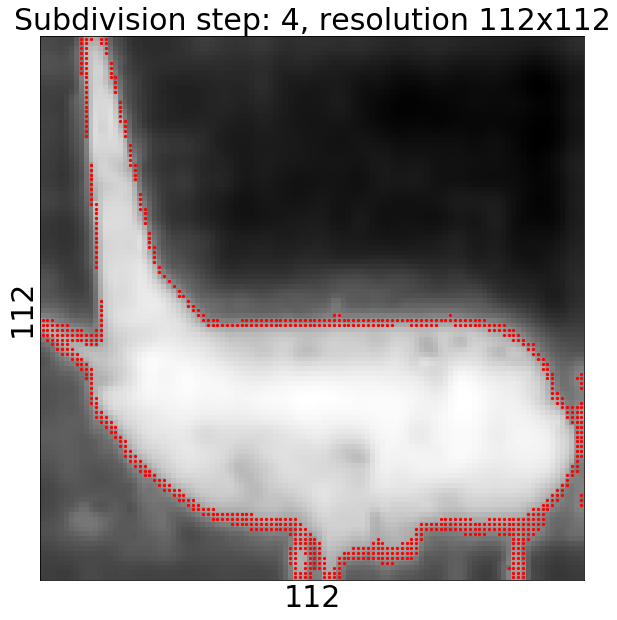

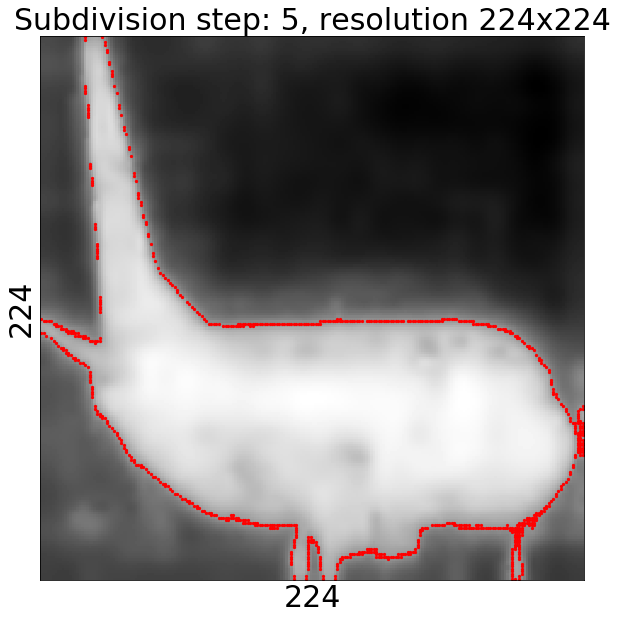

In [0]:
from detectron2.layers import interpolate
from point_rend.roi_heads import calculate_uncertainty
from point_rend.point_features import (
    get_uncertain_point_coords_on_grid,
    point_sample,
    point_sample_fine_grained_features,
)

num_subdivision_steps = 5
num_subdivision_points = 28 * 28


with torch.no_grad():
  plot_mask(
      mask_coarse_logits[0, category_idx].to("cpu").numpy(), 
      title="Coarse prediction"
  )

  mask_logits = mask_coarse_logits
  for subdivions_step in range(num_subdivision_steps):
    # Upsample mask prediction
    mask_logits = interpolate(
        mask_logits, scale_factor=2, mode="bilinear", align_corners=False
    )
    # If `num_subdivision_points` is larger or equalt to the
    # resolution of the next step, then we can skip this step
    H, W = mask_logits.shape[-2:]
    if (
      num_subdivision_points >= 4 * H * W
      and subdivions_step < num_subdivision_steps - 1
    ):
      continue
    # Calculate uncertainty for all points on the upsampled regular grid
    uncertainty_map = calculate_uncertainty(mask_logits, pred_classes)
    # Select most `num_subdivision_points` uncertain points
    point_indices, point_coords = get_uncertain_point_coords_on_grid(
        uncertainty_map, 
        num_subdivision_points
    )

    # Extract fine-grained and coarse features for the points
    fine_grained_features, _ = point_sample_fine_grained_features(
      mask_features_list, features_scales, pred_boxes, point_coords
    )
    coarse_features = point_sample(mask_coarse_logits, point_coords, align_corners=False)

    # Run PointRend head for these points
    point_logits = model.roi_heads.mask_point_head(fine_grained_features, coarse_features)

    # put mask point predictions to the right places on the upsampled grid.
    R, C, H, W = mask_logits.shape
    x = (point_indices[instance_idx] % W).to("cpu")
    y = (point_indices[instance_idx] // W).to("cpu")
    point_indices = point_indices.unsqueeze(1).expand(-1, C, -1)
    mask_logits = (
      mask_logits.reshape(R, C, H * W)
      .scatter_(2, point_indices, point_logits)
      .view(R, C, H, W)
    )
    plot_mask(
      mask_logits[instance_idx, category_idx].to("cpu"), 
      title="Subdivision step: {}".format(subdivions_step + 1),
      point_coords=(x, y)
    )

We can visualize mask prediction obtained in the previous block.

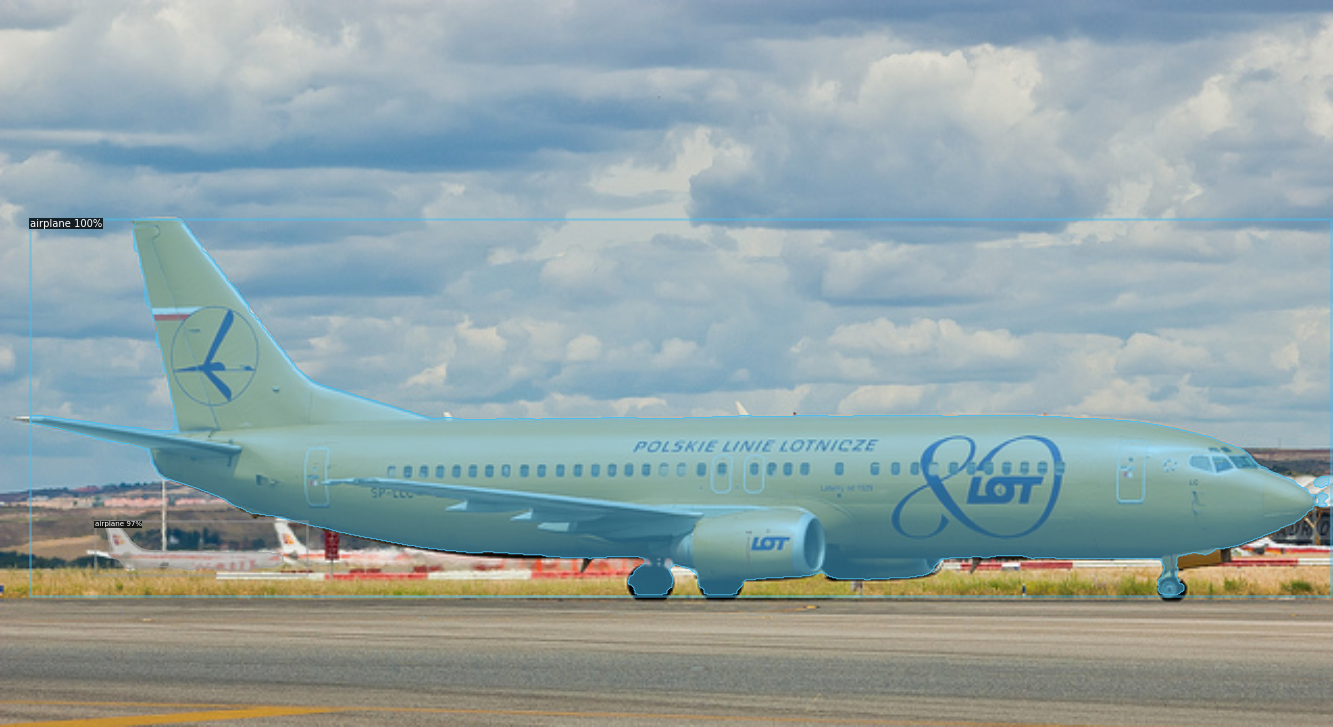

In [0]:
from detectron2.modeling import GeneralizedRCNN
from detectron2.modeling.roi_heads.mask_head import mask_rcnn_inference

results = detected_instances
mask_rcnn_inference(mask_logits, results)
results = GeneralizedRCNN._postprocess(results, batched_inputs, images.image_sizes)[0]

# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im_transformed[:, :, ::-1], coco_metadata)
v = v.draw_instance_predictions(results["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])